In [74]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [75]:
df = pd.read_csv("data/house_prices.csv")

In [78]:
# Selecting independent and dependent variables
Y = df["Price"]
X = df[["Bedrooms","Bathrooms","Offers","SqFt","Neighborhood","Brick"]]

In [79]:
# Converting categorical values to dummy variables
X = pd.get_dummies(X)

In [80]:
X.head()

,Bedrooms,Bathrooms,Offers,SqFt,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_no,Brick_yes
0,2,2,2,1790,1,0,0,0,1
1,4,2,3,2030,1,0,0,0,1
2,3,2,1,1740,1,0,0,0,1
3,3,2,3,1980,1,0,0,0,1
4,3,3,3,2130,1,0,0,0,1


In [81]:
# Normalizing independent variables to mean=0, std=1
sc = StandardScaler()
X = sc.fit_transform(X)

In [82]:
# Split your dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=44)

In [83]:
# plot losses by epoch
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

In [99]:
# specify the architecture of the model
model = tf.keras.models.Sequential([
    layers.InputLayer(input_shape=(9,)),
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1)
])   

In [100]:
# Specify loss and optimization for the model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.mse]
)

In [101]:
# Fit your model to your training data
model.fit(X_train, y_train, epochs=10000,verbose=0,validation_split=0.2)

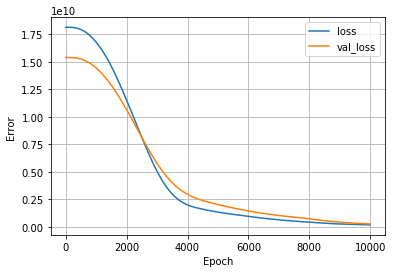

In [102]:
plot_loss(model.history)

In [91]:
# Predict on training data
pred = model.predict(X_test)

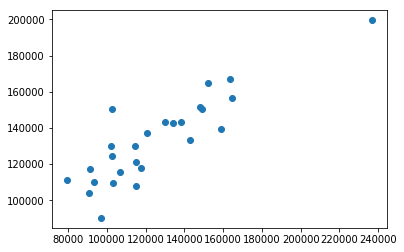

In [92]:
plt.scatter(pred,y_test)